In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
# from sklearn.compose import make_column_transformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, Callback
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.metrics as metrics
from scikeras.wrappers import KerasClassifier
from sklearn.datasets import make_classification
import time
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, make_scorer, f1_score, recall_score, balanced_accuracy_score,
matthews_corrcoef, jaccard_score, average_precision_score, roc_auc_score, accuracy_score)
from tabulate import tabulate
from sklearn.base import ClassifierMixin, BaseEstimator
import winsound
import random
import os
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [4]:
X_iris.shape

(150, 4)

In [8]:
print((y_iris == 0).sum(), (y_iris == 1).sum(), (y_iris == 2).sum())

50 50 50


In [9]:
X_nontest, X_test, y_nontest, y_test = train_test_split(X_iris, y_iris, test_size = 0.25)
X_train, X_val, y_train, y_val = train_test_split(X_nontest, y_nontest, test_size = 0.3)

In [16]:
X_train.shape, X_val.shape, X_test.shape

((78, 4), (34, 4), (38, 4))

Epoch 1/200
4/4 [==============================] - 1s 74ms/step - loss: 3.3940 - accuracy: 0.3590 - val_loss: 3.9945 - val_accuracy: 0.2353
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 2.9016 - accuracy: 0.3462 - val_loss: 3.4835 - val_accuracy: 0.2059
Epoch 3/200
4/4 [==============================] - 0s 17ms/step - loss: 2.6045 - accuracy: 0.2949 - val_loss: 2.9713 - val_accuracy: 0.2059
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 2.2182 - accuracy: 0.3846 - val_loss: 2.5220 - val_accuracy: 0.3235
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 1.8787 - accuracy: 0.3590 - val_loss: 2.1252 - val_accuracy: 0.3235
Epoch 6/200
4/4 [==============================] - 0s 14ms/step - loss: 1.6075 - accuracy: 0.3590 - val_loss: 1.7720 - val_accuracy: 0.3235
Epoch 7/200
4/4 [==============================] - 0s 16ms/step - loss: 1.3829 - accuracy: 0.3590 - val_loss: 1.4800 - val_accuracy: 0.3235
Epoch 8/200
4/4 [===

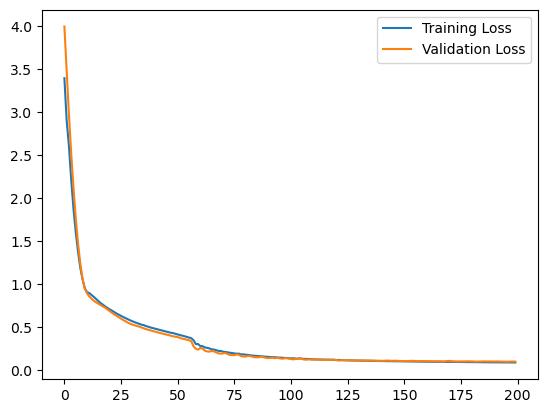

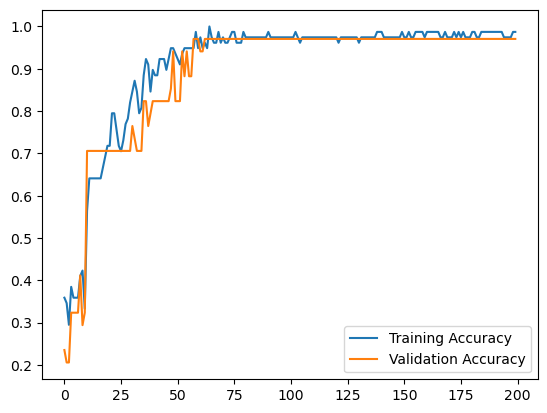

2/2 [==============================] - 0s 4ms/step
37
38
0.9736842105263158


In [49]:
model = Sequential([
    Dense(4, input_shape = (X_train.shape[1],)),
    LeakyReLU(alpha = 0.1),
    Dense(3, activation = 'softmax')
])
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=40, decay_rate=0.9, staircase=True)
model.compile(optimizer = Adam(learning_rate = lr_schedule), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs = 200, batch_size = 20, validation_data = [X_val, y_val])#, callbacks = [early_stopping])

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.legend()
plt.show()

y_pred_raw = model.predict(X_test)
y_pred = y_pred_raw.argmax(axis = 1)
print(sum(y_test == y_pred))
print(len(y_test))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)